In [6]:
import os
import requests
import wfdb

# Directory to save downloaded files
download_dir = "mitdb"
os.makedirs(download_dir, exist_ok=True)

# GitHub repo details
user = "rajeshkumar-niet"
repo = "ECG"
folder = "Data"
api_url = f"https://api.github.com/repos/{user}/{repo}/contents/{folder}"

# Get file list from GitHub API
response = requests.get(api_url)
if response.status_code == 200:
    files = response.json()
    print(f"📄 Found {len(files)} files in '{folder}' on GitHub.")
else:
    raise Exception(f"❌ Failed to fetch file list (status code: {response.status_code})")

# Download each file
for file in files:
    filename = file['name']
    download_url = file['download_url']
    local_path = os.path.join(download_dir, filename)

    if not os.path.exists(local_path):
        print(f"⬇️ Downloading {filename} ...")
        r = requests.get(download_url)
        if r.status_code == 200:
            with open(local_path, 'wb') as f:
                f.write(r.content)
        else:
            print(f"❌ Failed to download {filename} (HTTP {r.status_code})")
    else:
        print(f"✅ Already exists: {filename}")

# Load a specific ECG record
record_name = "mitdb/118e00"
record = wfdb.rdrecord(record_name)

# Extract ECG signal
ecg_clean = record.p_signal[:, 0]
fs = record.fs

print(f"\n✅ Clean ECG loaded from {record_name} | Shape: {ecg_clean.shape} | Sampling Rate: {fs} Hz")


📄 Found 67 files in 'Data' on GitHub.
✅ Already exists: 118e00.atr
✅ Already exists: 118e00.dat
✅ Already exists: 118e00.hea
⬇️ Downloading 118e00.xws ...
⬇️ Downloading 118e06.atr ...
⬇️ Downloading 118e06.dat ...
⬇️ Downloading 118e06.hea ...
⬇️ Downloading 118e06.xws ...
⬇️ Downloading 118e12.atr ...
⬇️ Downloading 118e12.dat ...
⬇️ Downloading 118e12.hea ...
⬇️ Downloading 118e12.xws ...
⬇️ Downloading 118e18.atr ...
⬇️ Downloading 118e18.dat ...
⬇️ Downloading 118e18.hea ...
⬇️ Downloading 118e18.xws ...
⬇️ Downloading 118e24.atr ...
⬇️ Downloading 118e24.dat ...
⬇️ Downloading 118e24.hea ...
⬇️ Downloading 118e24.xws ...
⬇️ Downloading 118e_6.atr ...
⬇️ Downloading 118e_6.dat ...
⬇️ Downloading 118e_6.hea ...
⬇️ Downloading 118e_6.xws ...
✅ Already exists: 119e00.atr
✅ Already exists: 119e00.dat
✅ Already exists: 119e00.hea
⬇️ Downloading 119e00.xws ...
⬇️ Downloading 119e06.atr ...
⬇️ Downloading 119e06.dat ...
⬇️ Downloading 119e06.hea ...
⬇️ Downloading 119e06.xws ...
⬇️ Downl

In [7]:
import os

# Use the record name available in your directory
record_name = '118e00'
mitdb_path = '/content/mitdb'
required_files = [f"{record_name}.dat", f"{record_name}.hea"]

# Check existence and size
all_exist = True
for file in required_files:
    file_path = os.path.join(mitdb_path, file)
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        print(f"✅ {file} found | Size: {os.path.getsize(file_path)} bytes")
    else:
        print(f"❌ {file} not found or is empty!")
        all_exist = False

if all_exist:
    print("\n✅ All required files are present.")
else:
    print("\n❌ Some files are missing or empty.")


✅ 118e00.dat found | Size: 2600000 bytes
✅ 118e00.hea found | Size: 173 bytes

✅ All required files are present.


In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 781.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [8]:
import wfdb

# Path to your uploaded MITDB record
record_path = 'sample_data/mitdb/118e00'

# Load the record
record = wfdb.rdrecord(record_path)

# Extract the ECG signal (assuming first channel is ECG)
ecg_clean = record.p_signal[:, 0]
fs = record.fs  # Sampling frequency

print(f"✅ Clean ECG loaded | Shape: {ecg_clean.shape} | Sampling Rate: {fs} Hz")


✅ Clean ECG loaded | Shape: (650000,) | Sampling Rate: 360 Hz


In [9]:
import wfdb
import numpy as np
import os

# Define base path to NSTDB signals
nstdb_path = 'sample_data/mitdb/'

# Function to read a full signal from NSTDB
def read_nstdb_signal(signal_name, channel=0):
    record = wfdb.rdrecord(os.path.join(nstdb_path, signal_name))
    return record.p_signal[:, channel]

# Load noise signals
baseline_wander = read_nstdb_signal('bw')     # Baseline Wander
muscle_artifact = read_nstdb_signal('ma')     # Muscle Artifact
electrode_motion = read_nstdb_signal('em')    # Electrode Motion

# Save as .npy files
np.save('baseline_wander.npy', baseline_wander)
np.save('muscle_artifact.npy', muscle_artifact)
np.save('electrode_motion.npy', electrode_motion)

print("✅ Noise signals saved as .npy files.")


✅ Noise signals saved as .npy files.


In [11]:
# Function to add noise to ECG with optional scaling
def add_noise(ecg, noise, snr_db):
    # Normalize both signals
    ecg_power = np.mean(ecg**2)
    noise_power = np.mean(noise**2)

    # Compute scaling factor for noise
    snr_linear = 10 ** (snr_db / 10)
    scaling_factor = np.sqrt(ecg_power / (snr_linear * noise_power))

    # Resize noise to match ECG length
    if len(noise) < len(ecg):
        noise = np.tile(noise, int(np.ceil(len(ecg)/len(noise))))[:len(ecg)]
    else:
        noise = noise[:len(ecg)]

    noisy_signal = ecg + scaling_factor * noise
    return noisy_signal

# Add different types of noise
snr_level = 5  # in dB (you can tweak this)

noisy_ecg_bw = add_noise(ecg_clean, baseline_wander, snr_level)
noisy_ecg_ma = add_noise(ecg_clean, muscle_artifact, snr_level)
noisy_ecg_em = add_noise(ecg_clean, electrode_motion, snr_level)

print("✅ Noise added to ECG signal with SNR =", snr_level, "dB")


✅ Noise added to ECG signal with SNR = 5 dB


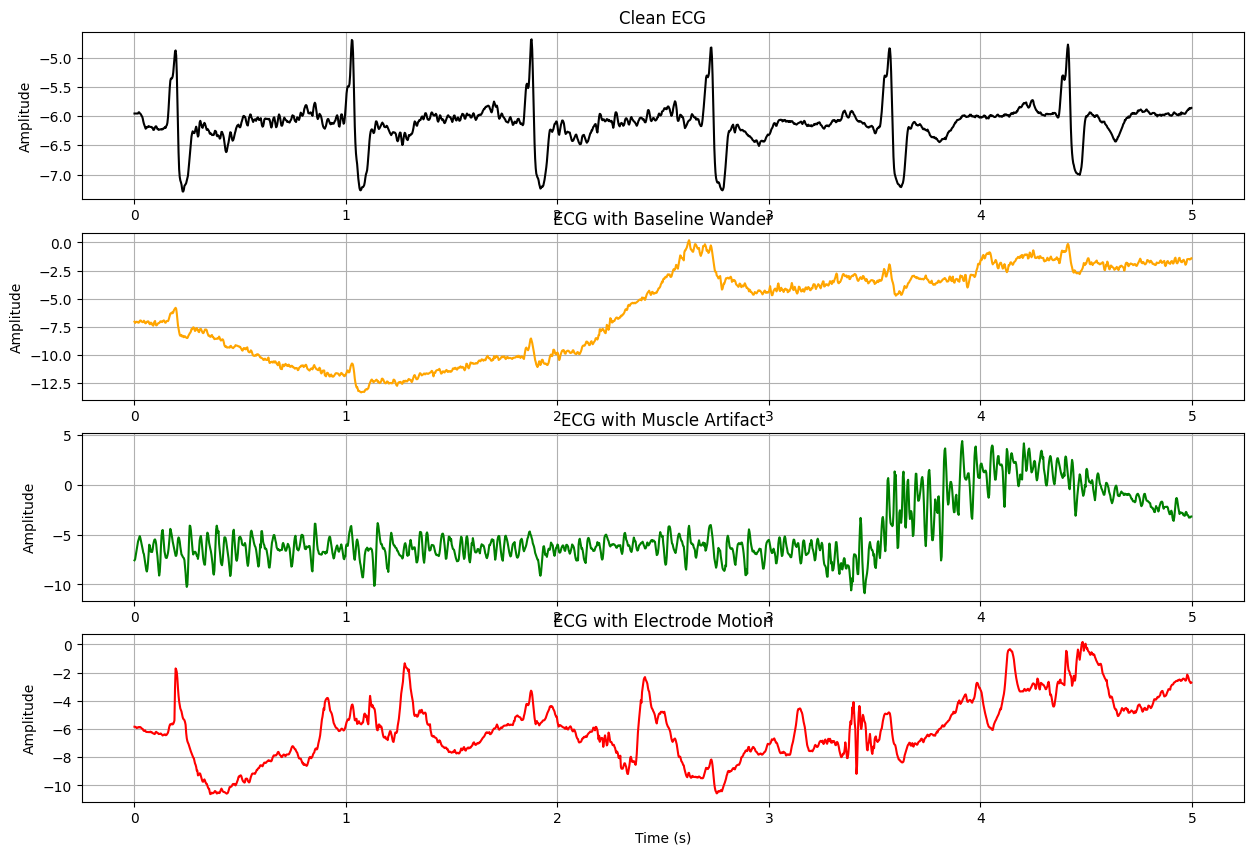

In [12]:
import matplotlib.pyplot as plt

# Define a segment for visualization (first 5 seconds)
fs = 360
start = 0
end = 5 * fs
time = np.arange(start, end) / fs

plt.figure(figsize=(15, 10))

# Clean ECG
plt.subplot(4, 1, 1)
plt.plot(time, ecg_clean[start:end], label='Clean ECG', color='black')
plt.title('Clean ECG')
plt.ylabel('Amplitude')
plt.grid(True)

# ECG with Baseline Wander
plt.subplot(4, 1, 2)
plt.plot(time, noisy_ecg_bw[start:end], label='ECG + Baseline Wander', color='orange')
plt.title('ECG with Baseline Wander')
plt.ylabel('Amplitude')
plt.grid(True)

# ECG with Muscle Artifact
plt.subplot(4, 1, 3)
plt.plot(time, noisy_ecg_ma[start:end], label='ECG + Muscle Artifact', color='green')
plt.title('ECG with Muscle Artifact')
plt.ylabel('Amplitude')
plt.grid(True)

# ECG with Electrode Motion
plt.subplot(4, 1, 4)
plt.plot(time, noisy_ecg_em[start:end], label='ECG + Electrode Motion', color='red')
plt.title('ECG with Electrode Motion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [14]:
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


In [15]:
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


In [16]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


In [17]:
def apply_highpass_filter(ecg_signal, fs):
    cutoff = 0.5  # Cutoff frequency for Baseline Wander removal
    b, a = butter_highpass(cutoff, fs)
    filtered_signal = filtfilt(b, a, ecg_signal)
    return filtered_signal


In [18]:
def apply_lowpass_filter(ecg_signal, fs):
    cutoff = 20  # Cutoff frequency for Muscle Artifact removal
    b, a = butter_lowpass(cutoff, fs)
    filtered_signal = filtfilt(b, a, ecg_signal)
    return filtered_signal


In [19]:
def apply_bandpass_filter(ecg_signal, fs):
    lowcut = 0.5  # Low cut frequency for Electrode Motion removal
    highcut = 50  # High cut frequency for Electrode Motion removal
    b, a = butter_bandpass(lowcut, highcut, fs)
    filtered_signal = filtfilt(b, a, ecg_signal)
    return filtered_signal


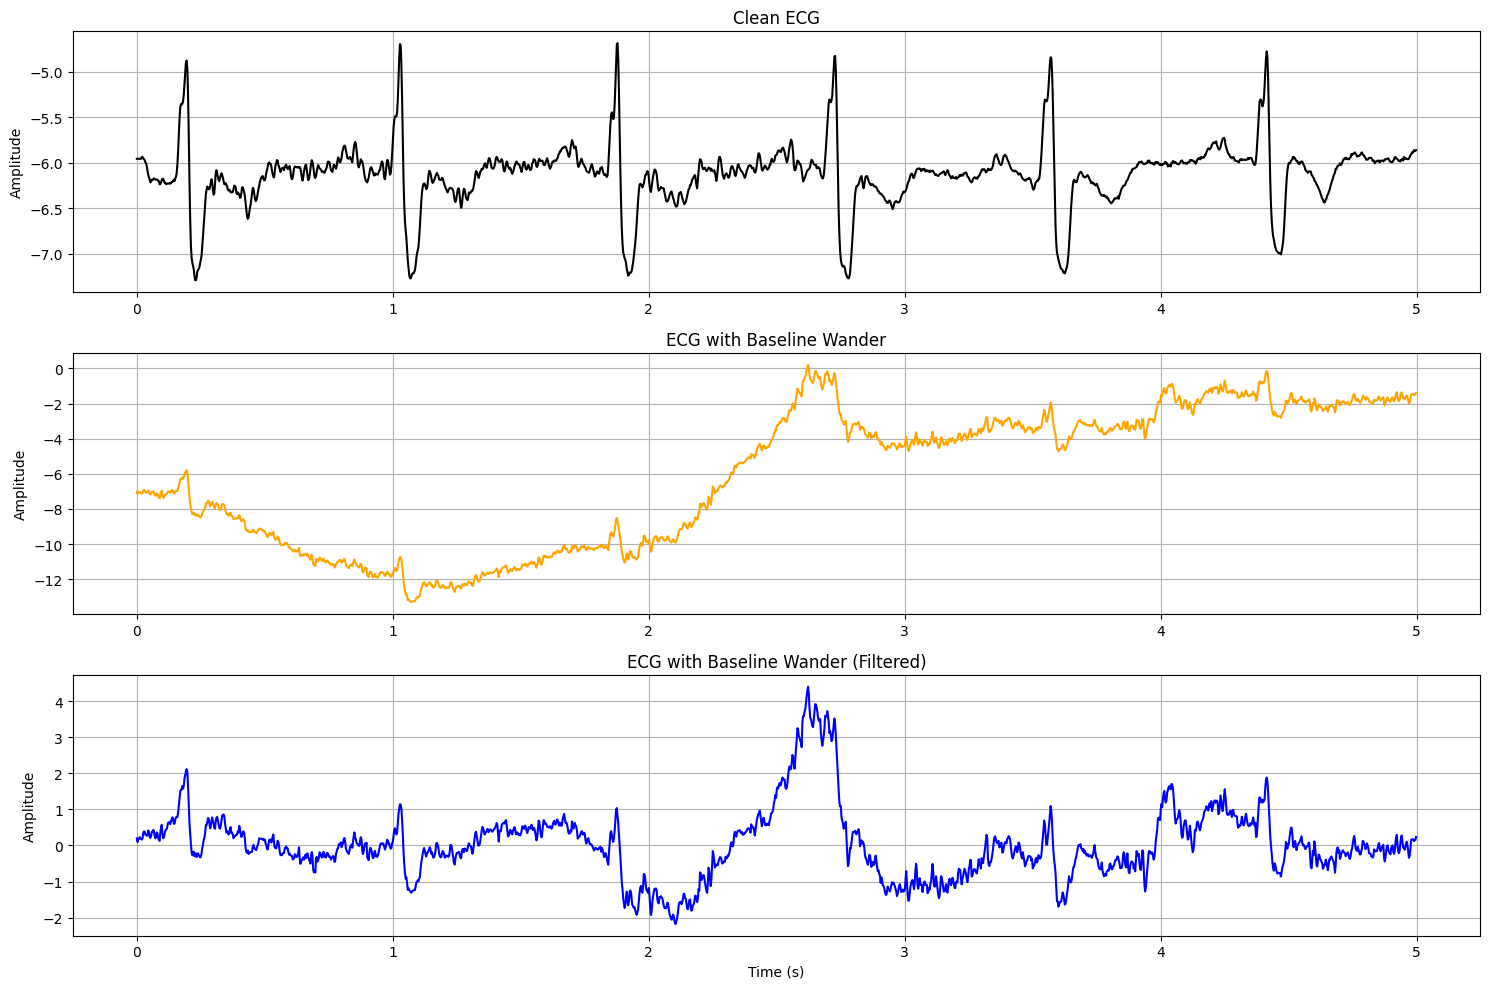

In [20]:
# Define a segment for visualization (first 5 seconds)
start = 0
end = 5 * fs
time = np.arange(start, end) / fs

# Apply the high-pass filter (Baseline Wander removal)
filtered_bw = apply_highpass_filter(noisy_ecg_bw, fs)

plt.figure(figsize=(15, 10))

# Clean ECG
plt.subplot(3, 1, 1)
plt.plot(time, ecg_clean[start:end], label='Clean ECG', color='black')
plt.title('Clean ECG')
plt.ylabel('Amplitude')
plt.grid(True)

# ECG with Baseline Wander (Before filtering)
plt.subplot(3, 1, 2)
plt.plot(time, noisy_ecg_bw[start:end], label='ECG + Baseline Wander', color='orange')
plt.title('ECG with Baseline Wander')
plt.ylabel('Amplitude')
plt.grid(True)

# ECG with Baseline Wander (After filtering)
plt.subplot(3, 1, 3)
plt.plot(time, filtered_bw[start:end], label='Filtered ECG (Baseline Wander)', color='blue')
plt.title('ECG with Baseline Wander (Filtered)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
import numpy as np

# Load clean ECG (you already loaded it earlier — make sure variable still exists or reload if needed)
# ecg_clean = ... (already loaded previously)

# Load noise signals from .npy files
baseline_wander = np.load('baseline_wander.npy')
muscle_artifact = np.load('muscle_artifact.npy')
electrode_motion = np.load('electrode_motion.npy')

# Truncate or pad noise signals to match length of clean ECG
def match_length(signal, target_length):
    if len(signal) > target_length:
        return signal[:target_length]
    else:
        return np.pad(signal, (0, target_length - len(signal)), 'constant')

# Match lengths
bw = match_length(baseline_wander, len(ecg_clean))
ma = match_length(muscle_artifact, len(ecg_clean))
em = match_length(electrode_motion, len(ecg_clean))

# Create noisy signals with different types of noise
ecg_bw = ecg_clean + bw
ecg_ma = ecg_clean + ma
ecg_em = ecg_clean + em

# Combine all noisy signals for training
X_noisy = np.stack([ecg_bw, ecg_ma, ecg_em])  # Shape: (3, N)
Y_clean = np.stack([ecg_clean] * 3)           # Shape: (3, N)

# Normalize between 0 and 1 (optional but recommended for DL models)
def normalize(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

X_noisy_norm = np.array([normalize(sig) for sig in X_noisy])
Y_clean_norm = np.array([normalize(sig) for sig in Y_clean])

print("✅ Training pairs prepared.")
print("Noisy signals shape:", X_noisy_norm.shape)
print("Clean signals shape:", Y_clean_norm.shape)


✅ Training pairs prepared.
Noisy signals shape: (3, 650000)
Clean signals shape: (3, 650000)


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape
input_shape = (650000, 1)  # One channel

# Build the model
def build_ecg_denoising_model():
    input_layer = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv1D(16, kernel_size=7, strides=2, padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling1D(pool_size=2, padding='same')(x)
    x = layers.Conv1D(32, kernel_size=5, strides=2, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2, padding='same')(x)

    # Bottleneck
    x = layers.Conv1D(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)

    # Decoder
    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(32, kernel_size=5, padding='same', activation='relu')(x)
    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(16, kernel_size=7, padding='same', activation='relu')(x)
    x = layers.UpSampling1D(size=2)(x)

    # Output layer
    output_layer = layers.Conv1D(1, kernel_size=1, activation='linear', padding='same')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Instantiate and compile
model = build_ecg_denoising_model()
model.compile(optimizer='adam', loss='mse')

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 650000, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 325000, 16)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 162500, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81250, 32)      │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 40625, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 20313, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 40626, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 40626, 32)      │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 81252, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 81252, 16)      │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_2 (UpSampling1D)  │ (None, 162504, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 162504, 1)      │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import numpy as np

# Load noise signals
baseline_wander = np.load('baseline_wander.npy')
muscle_artifact = np.load('muscle_artifact.npy')
electrode_motion = np.load('electrode_motion.npy')

# Function to add noise to clean ECG with a given SNR (in dB)
def add_noise(ecg_clean, noise_signal, snr_db=5):
    noise_signal = noise_signal[:len(ecg_clean)]
    signal_power = np.mean(ecg_clean**2)
    noise_power = np.mean(noise_signal**2)
    k = np.sqrt(signal_power / (10**(snr_db / 10) * noise_power))
    return ecg_clean + k * noise_signal

# Re-create noisy ECGs
ecg_noisy_bw = add_noise(ecg_clean, baseline_wander, snr_db=5)
ecg_noisy_ma = add_noise(ecg_clean, muscle_artifact, snr_db=5)
ecg_noisy_em = add_noise(ecg_clean, electrode_motion, snr_db=5)

# Stack and save
noisy_signals = np.stack([ecg_noisy_bw, ecg_noisy_ma, ecg_noisy_em])
clean_signals = np.stack([ecg_clean, ecg_clean, ecg_clean])

np.save("noisy_signals.npy", noisy_signals)
np.save("clean_signals.npy", clean_signals)

print("✅ Noisy and clean signals prepared and saved.")


✅ Noisy and clean signals prepared and saved.


In [24]:
import numpy as np

# Assuming ecg_clean is your original clean ECG
# and ecg_noisy_bw, ecg_noisy_ma, ecg_noisy_em are the noisy signals

# Stack noisy signals
noisy_signals = np.stack([ecg_noisy_bw, ecg_noisy_ma, ecg_noisy_em])

# Replicate the clean ECG 3 times to match shape
clean_signals = np.stack([ecg_clean, ecg_clean, ecg_clean])

# Save to .npy files
np.save("noisy_signals.npy", noisy_signals)
np.save("clean_signals.npy", clean_signals)

print("✅ Noisy and clean signals saved for training.")


✅ Noisy and clean signals saved for training.


In [25]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.models import Model

input_layer = Input(shape=(650000, 1))

# Encoder
x = Conv1D(16, kernel_size=3, padding='same', activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2, padding='same')(x)   # 325000
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)   # 162500
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)   # 81250

# Decoder
x = UpSampling1D(size=2)(x)                        # 162500
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = UpSampling1D(size=2)(x)                        # 325000
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = UpSampling1D(size=2)(x)                        # 650000
decoded = Conv1D(1, kernel_size=3, padding='same', activation='linear')(x)

model = Model(input_layer, decoded)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 650000, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 650000, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 325000, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 325000, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 162500, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 162500, 64)     │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 81250, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_3 (UpSampling1D)  │ (None, 162500, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 162500, 64)     │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_4 (UpSampling1D)  │ (None, 325000, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 325000, 32)     │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_5 (UpSampling1D)  │ (None, 650000, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 650000, 1)      │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,465 (103.38 KB)

 Trainable params: 26,465 (103.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Load training data
noisy = np.load("noisy_signals.npy")     # Shape: (3, 650000)
clean = np.load("clean_signals.npy")     # Shape: (3, 650000)

# Reshape for model: (samples, timesteps, channels)
X = noisy[..., np.newaxis]
y = clean[..., np.newaxis]

# Split into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=1,
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 14s/step - loss: 31.7041 - val_loss: 22.3884
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 19.4315 - val_loss: 12.6799
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - loss: 10.0705 - val_loss: 7.4840
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 6.3000 - val_loss: 8.6762
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 8.6498 - val_loss: 9.0673
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 8.3385 - val_loss: 7.3368
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 6.2003 - val_loss: 7.1245
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 5.6046 - val_loss: 8.0052
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 6.5910 - val_loss: 8.3289
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - loss: 6.4503 - val_loss: 7.8899
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - loss: 5.9330 - val_loss: 7.1783
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 5.3672 - val_loss: 6.9285
Epoch 13/20

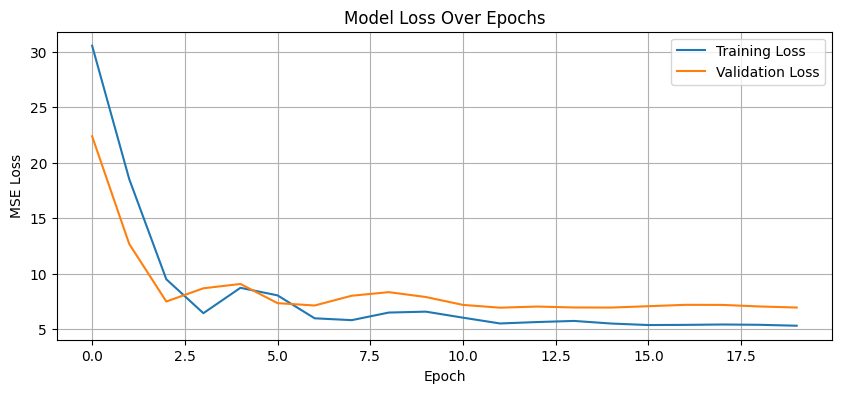

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


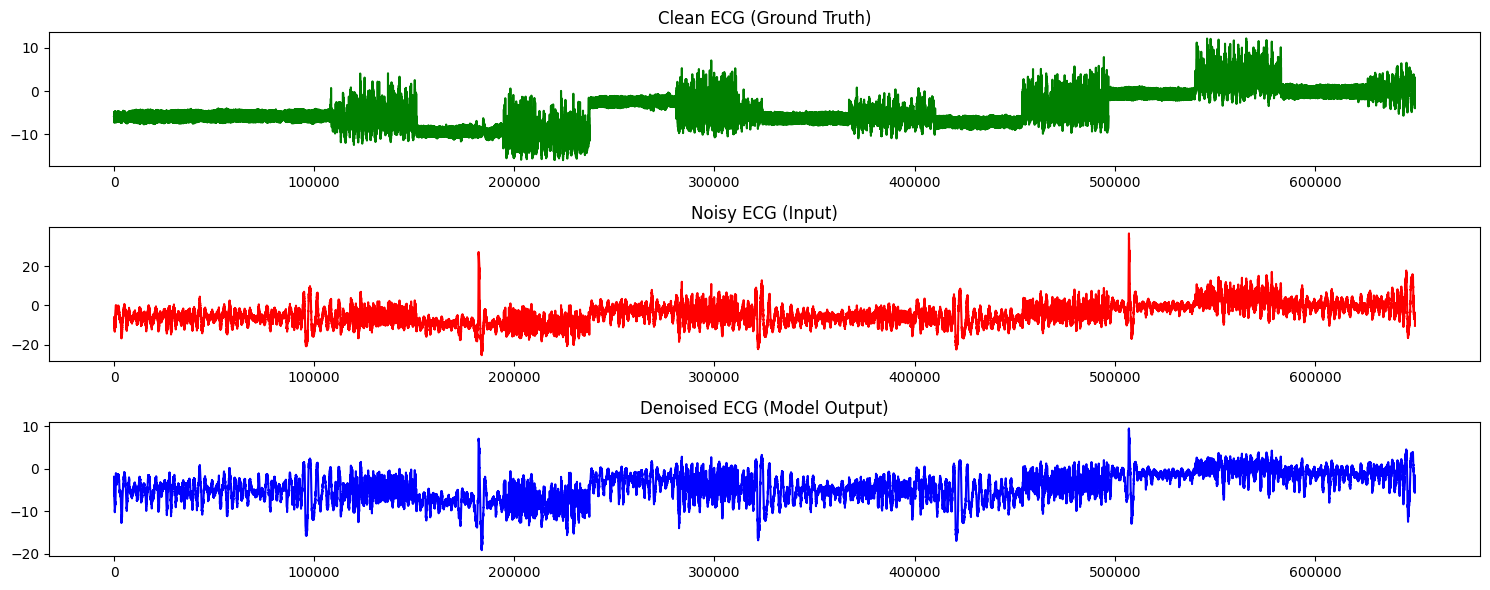

In [28]:
# Predict on validation data
predicted = model.predict(X_val)

# Plot original, noisy, and denoised ECG
i = 0  # Choose a sample index from validation set

plt.figure(figsize=(15, 6))

plt.subplot(3, 1, 1)
plt.plot(y_val[i], color='green')
plt.title("Clean ECG (Ground Truth)")

plt.subplot(3, 1, 2)
plt.plot(X_val[i], color='red')
plt.title("Noisy ECG (Input)")

plt.subplot(3, 1, 3)
plt.plot(predicted[i], color='blue')
plt.title("Denoised ECG (Model Output)")

plt.tight_layout()
plt.show()


In [29]:
model.save("ecg_denoising_autoencoder.h5")
print("Model saved as ecg_denoising_autoencoder.h5 ✅")


Model saved as ecg_denoising_autoencoder.h5 ✅


In [30]:
def compute_snr(clean, denoised):
    noise = clean - denoised
    snr = 10 * np.log10(np.sum(clean ** 2) / np.sum(noise ** 2))
    return snr

snr_value = compute_snr(y_val.flatten(), predicted.flatten())
print(f"Signal-to-Noise Ratio (SNR): {snr_value:.2f} dB")


Signal-to-Noise Ratio (SNR): 7.36 dB


In [31]:
model.save("ecg_denoising_autoencoder.keras")
print("Model saved in recommended Keras format ✅")


Model saved in recommended Keras format ✅
